In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [113]:
data=pd.read_csv("measurements.csv")


In [114]:
data.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [116]:
data.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

## Cleaning data

In [117]:
data["consume"]=data["consume"].str.replace(',', '.').astype(float)
data["distance"]=data["distance"].str.replace(',', '.').astype(float)

In [118]:
#consume is l/100km  
# speed is (km/h)

In [119]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


## Creating fuel efficiency metrics

In [120]:
data["time"]=data.distance/data.speed

In [121]:
data["litres"]=data.consume*100

In [143]:
data["litrestime"]=data.litres/data.time
# Just in case we are interested in taking into account how fast the fuel is consumed. 

In [123]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,time,litres,litres/time
0,28.0,5.0,26,"21,5",12,NaN,E10,0,0,0,45,E10,1.076923,500.0,464.285714
1,12.0,4.2,30,"21,5",13,NaN,E10,0,0,0,NaN,NaN,0.400000,420.0,1050.000000
2,11.2,5.5,38,"21,5",15,NaN,E10,0,0,0,NaN,NaN,0.294737,550.0,1866.071429
3,12.9,3.9,36,"21,5",14,NaN,E10,0,0,0,NaN,NaN,0.358333,390.0,1088.372093
4,18.5,4.5,46,"21,5",15,NaN,E10,0,0,0,NaN,NaN,0.402174,450.0,1118.918919


In [124]:
data.distance.unique()

array([ 28. ,  12. ,  11.2,  12.9,  18.5,   8.3,   7.8,  12.3,   4.9,
        11.9,  12.4,  11.8,  24.7,  17.3,  33.4,  25.9,  25.3,  14.2,
        17.9,  18.4,  18.3,  32.6,  19. ,  12.1,  20. ,   4.5,  11.7,
        10.2,   5.4,   2. ,  16. ,  27.3,  10.6,  11.6,  13.1,   6.1,
       153.5,   2.9,   2.1,   9.8,   6.8,  14. ,  13.9,   9.7,  24.8,
        34.8,   5.2,  10.5,  13.2,  13. ,  12.2,  12.5,  15.7,   6.4,
         5.3,  26.2,  18.8,  22.9, 162.7,  16.6,  15.9,   5.1,  22.4,
        31.1,  16.1,   4.2,  17.4,  23.5,   7. ,  20.1,  20.8,   1.7,
        35.9,  36.9,  16.8,   9.9,  36.6,  44.9,  21.6,  39.4,  26.6,
        53.2,  18.9,  43.5,  16.4,  21.1,  22.7,  44.4,  35.8,  40.6,
        14.1,  58.7,  16.2,  31.8,  51.6,  38.6,  81.2, 130.3,  67.2,
        43.7,  56.1,  39. ,  38.5,  28.2,  19.6,  22.2,  13.6,  12.6,
         8.7,   7.9,   2.4,  18.1,   1.3,  13.4,  12.8,  29. ,  31.4,
        27.1,  25.2,  14.3,  16.9,   9.2,  31.5,  24.9,  17. ,   7.4,
        25.7,  24.5,

In [125]:
data.consume.unique()

array([ 5. ,  4.2,  5.5,  3.9,  4.5,  6.4,  4.4,  5.3,  5.6,  4.6,  5.9,
        5.1,  4.7,  4.9,  5.7,  4.1,  5.8,  4.8,  4.3,  5.2,  7.4,  6.5,
        4. ,  3.3,  9.9,  6.1,  6.2,  7.9, 12.2,  5.4,  3.6,  6.9,  8.7,
        6.3,  6. , 10.8,  8.1,  7.1,  3.8,  9. ,  3.7, 11.5,  6.6])

In [126]:
data.speed.unique()

array([26, 30, 38, 36, 46, 50, 43, 40, 42, 59, 58, 24, 32, 39, 37, 62, 57,
       21, 28, 29, 35, 51, 23, 55, 44, 25, 63, 61, 82, 52, 18, 41, 20, 56,
       45, 22, 60, 33, 34, 71, 75, 66, 27, 49, 14, 80, 53, 47, 73, 69, 85,
       67, 54, 31, 48, 16, 88, 65, 90, 87], dtype=int64)

In [127]:
data.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [128]:
data.AC.unique()

array([0, 1], dtype=int64)

In [129]:
data.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [130]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas', 'time', 'litres', 'litres/time'],
      dtype='object')

## Visualizations

<AxesSubplot:xlabel='AC', ylabel='consume'>

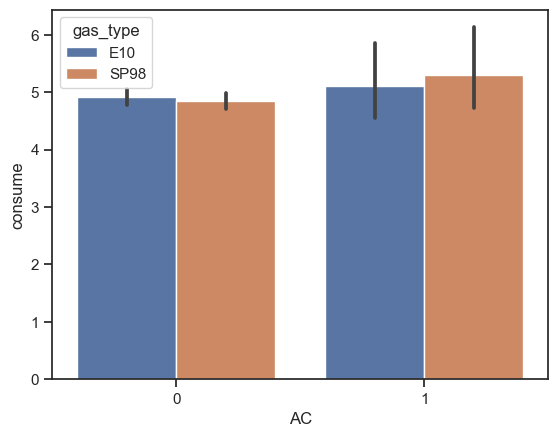

In [131]:
sns.barplot(data=data, x="AC", y="consume", hue="gas_type")

<AxesSubplot:xlabel='gas_type', ylabel='consume'>

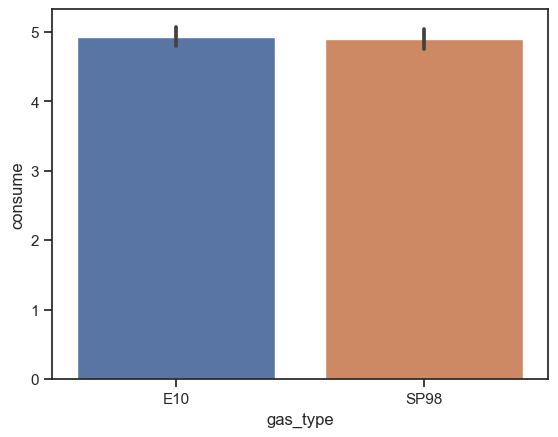

In [132]:
sns.barplot(data=data, x="gas_type", y="consume")

In [ ]:
# Gas type does not seem to affect consumption or vary depending on the AC being active, lets analyze this statistically.

## Correlation and relationships between variables

In [145]:
db=data[['distance', 'consume', 'speed', 'gas_type', 'AC', 'rain', 'sun', 'litres', 'time', 'litrestime']]
dbm=data[['distance', 'consume', 'speed', 'litres', 'time', 'litrestime']]

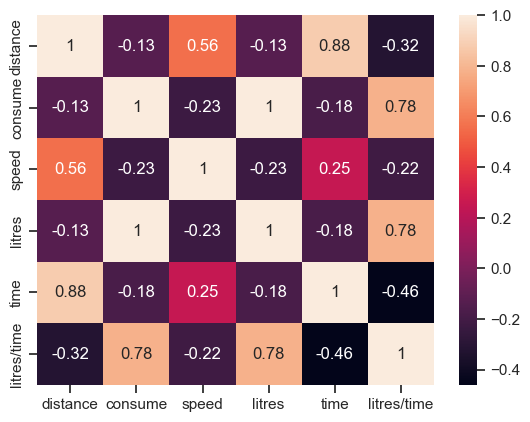

In [135]:
matrix = dbm.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [136]:
# consumption is correlated with the eficiency metric litres/time
# Unsurprisingly, time is correlated with traveled distance.
# Also, distance is correlated with speed.

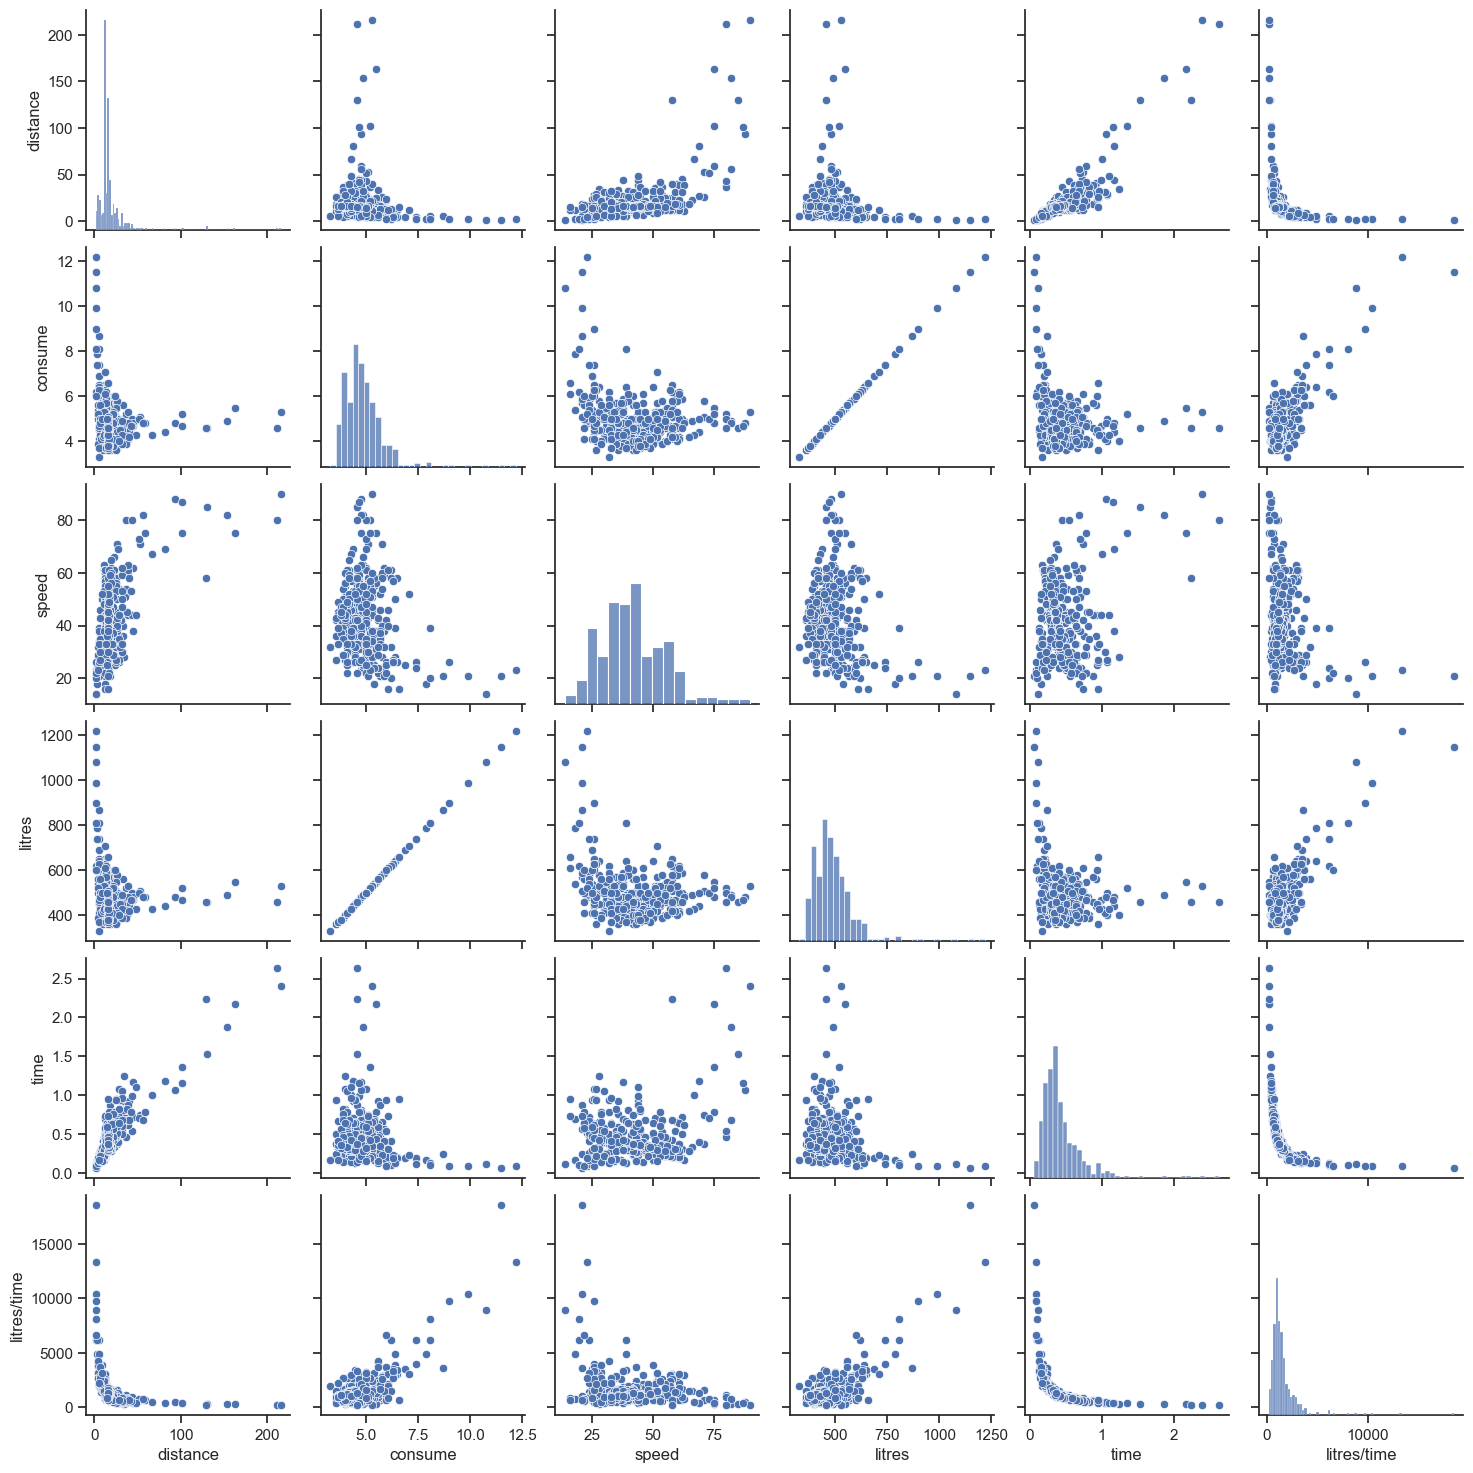

In [137]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dbm)

plt.show()

In [138]:
# Variable distributions seem to be skewed
# There do not appear to be linear relationships between the numerical variables and consumption, except for consumption with Litres/time.
# Consumption is linearly related to litres since it uses this metric for the calculation.

## Model

In [139]:
import statsmodels.api as sm

In [140]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import math

model_lin = sm.OLS.from_formula("consume ~ distance + speed + gas_type + AC + litres + time", data=db)

result_lin = model_lin.fit()

result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consume   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.752e+30
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:34:12   Log-Likelihood:                 12142.
No. Observations:                 388   AIC:                        -2.427e+04
Df Residuals:                     381   BIC:                        -2.424e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4.885e-15   3.15e-15     -1.549      0.122   -1.11e-14    1.32e-15
gas_type[T.SP98]  1.978e-15   6.56e-16      3.016      0.003    6.88e-16    3.27e-15
distance         -2.776e-17   4.99e-17     -0.556      0.578   -1.26e-16    7.03e-17
speed             2.776e-17   4.08e-17      0.681      0.496   -5.24e-17    1.08e-16
AC               -8.882e-16   1.21e-15     -0.736      0.462   -3.26e-15    1.48e-15
litres               0.0100   3.41e-18   2.93e+15      0.000       0.010       0.010
time               1.11e-15   3.13e-15      0.355      0.723   -5.03e-15    7.26e-15
==============================================================================
Omnibus:                       27.795   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.506
Skew:                           0.629   Prob(JB):                     8.74e-08
Kurtosis:                       3.652   Cond. No.                     6.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
#The only variables that seem to be significative are gas type and the amount of litres consumed, which does not seem relevant
# In conclusion, SP98 leads to lower levels of fuel consumption.

## Model using alternative fuel eficiency metric

In [146]:
model_lin = sm.OLS.from_formula("litrestime ~ distance + speed + gas_type + AC + litres + time ", data=db)

result_lin = model_lin.fit()

result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             litrestime   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     195.6
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          4.92e-113
Time:                        17:35:18   Log-Likelihood:                -3144.5
No. Observations:                 388   AIC:                             6303.
Df Residuals:                     381   BIC:                             6331.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1207.1706    406.588     -2.969      0.003   -2006.609    -407.733
gas_type[T.SP98]   132.3577     84.520      1.566      0.118     -33.826     298.542
distance            49.6385      6.431      7.718      0.000      36.993      62.284
speed              -27.9836      5.255     -5.325      0.000     -38.316     -17.651
AC                -181.1624    155.493     -1.165      0.245    -486.895     124.570
litres              10.2839      0.440     23.370      0.000       9.419      11.149
time             -4687.0608    402.868    -11.634      0.000   -5479.183   -3894.939
==============================================================================
Omnibus:                      358.586   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20383.806
Skew:                           3.594   Prob(JB):                         0.00
Kurtosis:                      37.773   Cond. No.                     6.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Using this metric, gas type does not seem to have a significative impact on consumption.